In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


import torch 
import torchvision

In [2]:
mnist_train = pd.read_csv('../datasets/mnist/train.csv')
mnist_test = pd.read_csv('../datasets/mnist/test.csv')

In [3]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop columns which have missing value

In [4]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [5]:
random_sample = mnist_train.sample(8)
random_sample.shape 

(8, 785)

In [6]:
image_features = random_sample.drop('label', axis=1)
image_features.shape

(8, 784)

In [7]:
# 8 images, each image have 28px width and 28px height

image_batch = (torch.Tensor(image_features.values / 255)).reshape(-1, 28, 28)
image_batch.shape

torch.Size([8, 28, 28])

In [8]:
# 8 images in batch, each image have 1 channel, 28px width and 28px height

image_batch = image_batch.unsqueeze(1)
image_batch.shape 

torch.Size([8, 1, 28, 28])

In [9]:
# grid convert 8 images to 3 channels

grid = torchvision.utils.make_grid(image_batch, nrow=8)
grid.shape 

torch.Size([3, 32, 242])

(-0.5, 241.5, 31.5, -0.5)

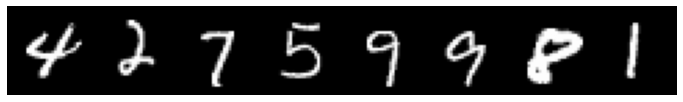

In [10]:
plt.figure(figsize=(12, 12))
plt.imshow(grid.numpy().transpose((1, 2, 0))) # plt expect channel dimension at the last dimension
plt.axis('off')

In [11]:
mnist_train_features = mnist_train.drop('label', axis=1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_target = mnist_test['label']

In [12]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [13]:
print(X_train_tensor.shape)
print(Y_train_tensor.shape)

print(x_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([60000, 784])
torch.Size([60000])
torch.Size([10000, 784])
torch.Size([10000])


In [14]:
X_train_tensor = X_train_tensor.reshape(-1, 1, 28, 28)

x_test_tensor = x_test_tensor.reshape(-1, 1, 28, 28)

In [15]:
print(X_train_tensor.shape)
print(x_test_tensor.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [16]:
import torch.nn as nn 
import torch.nn.functional as F

In [17]:
in_size = 1 # number of channels in the input image (grayscale)
# in_size = 3 : RGB image

# the number of feature maps generated by each convolutional layer
hid1_size = 16 
hid2_size = 32 

# 10 image to classify: number 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
out_size = 10

# square kernel with 5px width and 5px height
k_conv_size = 5

In [18]:
class ConvNet(nn.Module):

    def __init__(self):
        super(ConvNet, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))

        # 512 based on our input image size and the strides and the kernel size that we have chosen for our convolution
        # using the formula that we had discussed earlier
        self.fc = nn.Linear(512, out_size )

    def forward(self, x):

        out = self.layer1(x)
        print(out.shape)

        out = self.layer2(out)
        print(out.shape)

        # Convert to 1-D tensor
        out = out.reshape(out.size(0), -1)
        print(out.shape)

        out = self.fc(out)
        print(out.shape)
        
        return out

In [19]:
model = ConvNet()

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [21]:
model.to(device)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [22]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [23]:
learning_rate = 0.01

In [24]:
# Loss function 
criterion = nn.CrossEntropyLoss()

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
num_epochs = 50
loss_values = list()

In [27]:
for epoch in range(1, num_epochs):

    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch - %d, loss - %0.5f ' %(epoch, loss.item()))
    loss_values.append(loss.item())

torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 1, loss - 2.49881 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 2, loss - 3.46276 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 3, loss - 2.09628 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 4, loss - 1.61705 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 5, loss - 1.45187 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 6, loss - 1.16191 
torch.Size([60000, 16, 12, 12])
torch.Size([60000, 32, 4, 4])
torch.Size([60000, 512])
torch.Size([60000, 10])
Epoch - 7, loss - 1.01524 
torch.Size([60000, 16, 12, 12])
to

Padding = 0

Stride = 1

Size of output = 24 x 24 => Pool => 12 x 12

Second convolutional layer
32 depth, size of output = 8 x 8 => Pool => 4 x 4

=> 32 x 4 x 4 = 512

Text(0, 0.5, 'loss')

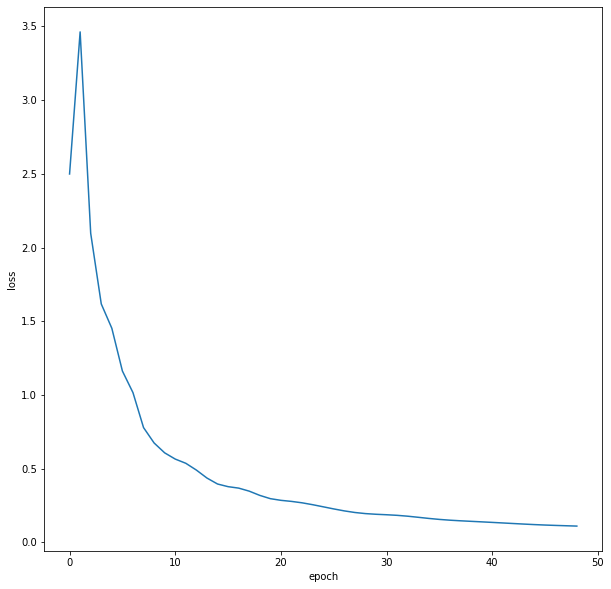

In [28]:
x = (range(0, num_epochs - 1))

plt.figure(figsize=(10,10))
plt.plot(x, loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')

In [29]:
model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [31]:
with torch.no_grad():
    
    correct = 0
    total = 0
    
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    
    print('Accuracy: ', accuracy_score(predicted, y_test))
    print('Precision: ', precision_score(predicted, y_test, average='weighted'))
    print('Recall; ', recall_score(predicted, y_test, average='weighted'))

torch.Size([10000, 16, 12, 12])
torch.Size([10000, 32, 4, 4])
torch.Size([10000, 512])
torch.Size([10000, 10])
Accuracy:  0.9701
Precision:  0.970316885664354
Recall;  0.9701
